In [1]:
# load stuff:
import scipy.optimize as so
import datetime as dt


from dataload_helper import Dataset
from dataeval_helper import *  # load here also numpy, scipy,...
from global_params import *

#import cartopy.crs as ccrs


In [2]:
#load Datasets



#Global Params
SETNAME1="MERRA2"
FILES1="../../../../../../work/mh0066/m301053/Data/MERRA2_instM_3d_asm_Np_PS,RH,T_1980-2023/MERRA2_*"
DATALOC_SPECIFIC1 = '/MERRA2_instM_3d_asm_Np_PS,RH,T_1980-2023/'
DATALOC1 = '../Data' + DATALOC_SPECIFIC1

SETNAME2="JRA-55"
FILES2="../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_isobaric_1958-2021/anl*"
DATALOC_SPECIFIC2 = '/JRA-55_Monthly_1.25_Deg_isobaric_1958-2021/'
DATALOC2 = '../../../../../../work/mh0066/m301053/Data' + DATALOC_SPECIFIC2

RESLOC = '../Trendanalysis_1980-2021/'
RESLOC_SPECIFIC = ''

TOPOANALYSIS=True
MASKELEVATION=True


OneGraph=False
#Times for analysis

t1='1959-12-01'
t2='2023-12-01'
t1='1980-01-01'
t2='2021-12-12'

In [3]:
DS2 = Dataset(files=FILES1, setname = SETNAME1, dataloc = DATALOC1)
DS1 = Dataset(files=FILES2, setname = SETNAME2, dataloc = DATALOC2)

Loading full dataset MERRA2
[########################################] | 100% Completed | 96.38 s
<xarray.Dataset>
Dimensions:  (time: 522, p: 42, lat: 361, lon: 576)
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * p        (p) float64 1e+03 975.0 950.0 925.0 900.0 ... 0.7 0.5 0.4 0.3 0.1
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-06-01
Data variables:
    RH       (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
    PS       (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    T        (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
Attributes: (12/32)
    History:                           Original file generated: Thu May  7 22...
    Filename:                          MERRA2_100.instM_3d_asm_Np.198001.nc4
    Comment:                  

In [4]:
for DS in (DS1,DS2):
    if MASKELEVATION==True and DS.setname=='JRA-55':
        DS_2D = Dataset(files='../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_surface_1958-2021/*pres*.nc', setname = 'JRA-55_2D', dataloc = '../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_surface_1958-2021/')
        DS.ds = elevation2nan( DS.ds, DS_2D.ds )
        print(DS.ds)

Loading full dataset JRA-55_2D
[########################################] | 100% Completed | 4.77 ss
<xarray.Dataset>
Dimensions:  (time: 768, lon: 288, lat: 145)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2021-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
Data variables:
    SP       (time, lat, lon) float32 dask.array<chunksize=(12, 145, 288), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Jul 21 13:39:16 2023: cdo -f nc --eccodes copy anl_surf...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...
<xarray.Dataset>
Dimensions:  (time: 768, p: 37, lat: 145, lon: 288)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2021-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2

In [5]:
# =======================================================================
#Initilize topography analysis
if TOPOANALYSIS==True:
    TOPO = Dataset(files="../../../../../../work/mh0066/m301053/Data/Topo/topo_r720x360.nc", setname = 'TOPO', dataloc = '../../../../../../work/mh0066/m301053/Data/Topo/')
    TOPO.land_mask = xr.where(TOPO.ds.topo >= 0.0, True, False)
    
    # Reindex the land mask to match the climate data grid
    TOPO.land_mask_reindexed = TOPO.land_mask.reindex_like(DS.ds, method='nearest')
    print(TOPO.land_mask_reindexed)
    #TOPO.ds.where(TOPO.land_mask_reindexed==False).topo.plot(ax=ax, transform=ccrs.PlateCarree(),x='lon',y='lat',cmap=cmap_elevation,cbar_kwargs= cbar_kwargs) for ocean


Loading full dataset TOPO
[########################################] | 100% Completed | 101.22 ms
<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    topo     (lat, lon) float32 dask.array<chunksize=(360, 720), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri May 05 16:46:47 2023: cdo -f nc topo,r720x360 topo_r720...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...
<xarray.DataArray 'topo' (lat: 361, lon: 576)>
dask.array<getitem, shape=(361, 576), dtype=bool, chunksize=(361, 576), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 8

In [6]:
def lin(x,a,b):
    return a*x + b


In [7]:
# =======================================================================
# Temp Trend in different latitudes, All in one Plot...


if OneGraph==True:
    zones=[[0,10],[30,50],[79,90]]

    heights=[[1000,950]]

    fig, ax = plt.subplots()

    for DS in (DS1,DS2):

        for i in zones:

            print("Here")
            for j in heights:

                Temp=DS.ds.T.sel(p=slice(j[0],j[1])).where((np.abs(DS.ds.lat) >= i[0]) & (np.abs(DS.ds.lat) <= i[1])).mean(("lon","lat","p"))
                Temp=Temp-Temp.mean("time").to_numpy()

                print("Here")

                Temp.attrs = DS.ds.T.attrs
                time_raw=Temp.time
                time_mon=time_raw.dt.month+12*time_raw.dt.year


                lin_para,dlin_para=so.curve_fit(lin,time_mon.to_numpy(),Temp.T.to_numpy())
                dlin_para=np.sqrt(dlin_para.diagonal())

                decimals=2

                print("Here")

                lh, = ax.plot(
                    time_raw.to_numpy()[::12],
                    year_mean(Temp).to_numpy(), 
                    label=f"{DS.setname}, [-{i[1]},-{i[0]}]° and [{i[0]},{i[1]}]°, [{j[0]},{j[1]}]hPa",
                    linewidth=0.8,
                )

                ax.plot(
                    time_raw.to_numpy(),
                    lin(time_mon.to_numpy(),*lin_para),
                    linestyle='dotted',
                    label=f"Fit: grad= {12*lin_para[0]:.3f} +- {12*dlin_para[0]:.3f} K/y",
                    color=lh.get_color(),
                )
                
                grad[i,j] = lin_para[0]
                
                print(f"Done with {i},{j}")

    ax.legend(fontsize="x-small", loc ="lower right")
    fig.savefig(f"{RESLOC}{RESLOC_SPECIFIC}Temp_Timeseries.png")

    plt.show()



In [8]:
# =======================================================================
# Temp Trend in different latitudes, All in different subplots...

# =======================================================================
#A nice Plot function
plt.rcParams['axes.grid'] = True


def startfig(zones,heights,title,ylabel):

    cols = [f'Height = [{col[0]},{col[1]}]' for col in heights]

    rows = [f'|Lat| = [{row[0]},{row[1]}]' for row in zones]

    fig, axes = plt.subplots(nrows=len(zones), ncols=len(heights), 
                             figsize=( 4* len(heights),3*len(zones)),
                             sharex=True, sharey=True,
                             constrained_layout=True,
                            )
    
    plt.setp(axes[:,0], ylabel=f'{ylabel[0]} change in {ylabel[1]}')
    plt.setp(axes[-1,:], xlabel='Time in y')

    fig.suptitle(f'{title}',size='x-large',)

    pad = 5 # in points

    for ax, col in zip(axes[0], cols):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline',
                   )

    for ax, row in zip(axes[:,0], rows):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center',
                   )
    
    
    
    
    return fig, axes
    
    
        
def endfig(fig, axes, name:str):
    
    #fig.tight_layout()
    #fig.subplots_adjust(left=0.15, top=0.95)
        
    plt.savefig(RESLOC+RESLOC_SPECIFIC+name,)#dpi=400
    
    plt.show()
    
    return


In [12]:
def maketrendana(zones,heights,ds_Tuple,titlesup,ylabel,fitunit,setname):

    fig, axes = startfig(zones,heights,f'Trendanalysis of {titlesup}',ylabel,)
    
    grad = np.ones((2,len(zones),len(heights)))
    
    setnamenr=0
    for ds in ds_Tuple:
        
        inr=0
        for i in zones:
            print(f"Process zone: {i}")
            with ProgressBar():
                Temp_raw=dask.compute(ds.sel(time=slice(t1,t2)).where((np.abs(DS.ds.lat) >= i[0]) & (np.abs(ds.lat) <= i[1])).weighted(np.cos(np.deg2rad(ds.lat))).mean(("lon","lat")))[0]

            jnr=0
            for j in heights:

                Temp=dask.compute(Temp_raw.sel(p=slice(j[0],j[1])).mean(("p")))[0]
                Temp=Temp-Temp.mean("time").to_numpy()

                
                time_raw=Temp.time
                time_mon=time_raw.dt.month+12*time_raw.dt.year

                lin_para,dlin_para=so.curve_fit(lin,time_mon.to_numpy(),Temp.to_numpy())
                dlin_para=np.sqrt(dlin_para.diagonal())

                decimals=2

                lh, = axes[inr,jnr].plot(
                    time_raw.to_numpy()[::12],
                    year_mean(Temp).to_numpy(), 
                    #label=f"{DS.setname}",
                    markersize=3, marker = "x", linestyle='-', linewidth = 0.8,
                )
                
                if fitunit=='K':
                    axes[inr,jnr].plot(
                        time_raw.to_numpy(),
                        lin(time_mon.to_numpy(),*lin_para),
                        label=setname[setnamenr]+f", Grad= ({120*lin_para[0]:.2f} +- {120*dlin_para[0]:.2f}) "+fitunit+"/dec",
                        color=lh.get_color(), linewidth = '2', linestyle='dotted',
                    )
                else:
                    axes[inr,jnr].plot(
                        time_raw.to_numpy(),
                        lin(time_mon.to_numpy(),*lin_para),
                        label=setname[setnamenr]+f", Grad= ({120*lin_para[0]:.4f} +- {120*dlin_para[0]:.4f}) "+fitunit+"/dec",
                        color=lh.get_color(), linewidth = '2', linestyle='dotted',
                    )
                
                grad[setnamenr,inr,jnr] = 120*lin_para[0]
                
                axes[inr,jnr].legend(fontsize="x-small",
                                  )

                print(f"Done with {i},{j}")
                jnr=jnr+1
            inr=inr+1
        setnamenr=setnamenr+1

    endfig(fig, axes, f"{RESLOC}{RESLOC_SPECIFIC}{titlesup}_Timeseries.png")
    
    print("Full Gradient",grad)
    print("Mean,Std of zones",np.mean(grad,axis=1),np.std(grad,axis=1))
    print("Mean,Std of heights",np.mean(grad,axis=2),np.std(grad,axis=2))

In [13]:

zones=[[0,10],[30,50],[70,90]]
heights=[[1000,800],[800,600],[600,400]]



Process zone: [0, 10]
[########################################] | 100% Completed | 23.77 s
Done with [0, 10],[1000, 800]
Done with [0, 10],[800, 600]
Done with [0, 10],[600, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 3.97 sms
Done with [30, 50],[1000, 800]
Done with [30, 50],[800, 600]
Done with [30, 50],[600, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 3.59 sms
Done with [70, 90],[1000, 800]
Done with [70, 90],[800, 600]
Done with [70, 90],[600, 400]
Process zone: [0, 10]
[########################################] | 100% Completed | 276.36 s
Done with [0, 10],[1000, 800]
Done with [0, 10],[800, 600]
Done with [0, 10],[600, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 145.59 s
Done with [30, 50],[1000, 800]
Done with [30, 50],[800, 600]
Done with [30, 50],[600, 400]
Process zone: [70, 90]
[########################################] | 100% Completed |

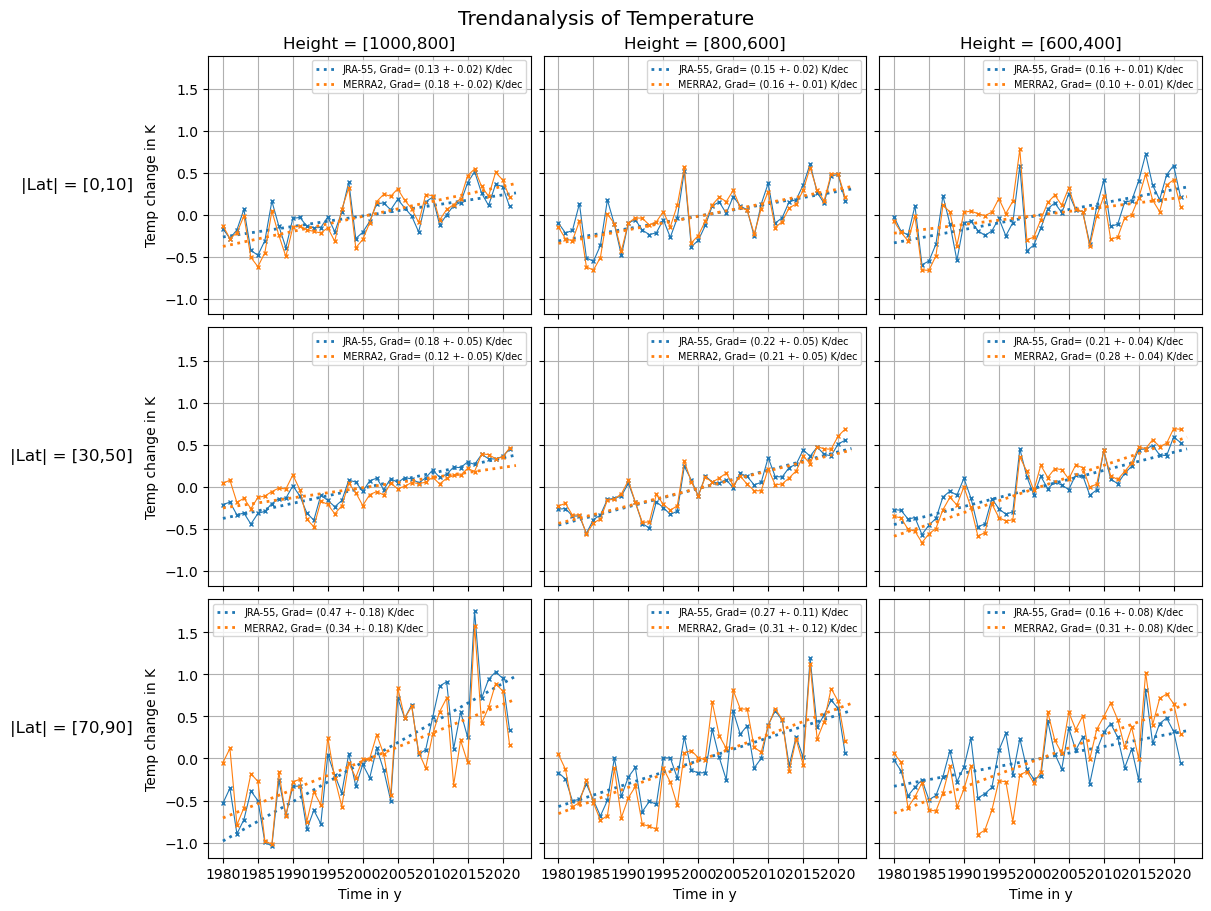

Full Gradient [[[0.12509193 0.14752628 0.15855926]
  [0.18000167 0.21744808 0.21493851]
  [0.46841058 0.27267927 0.15750438]]

 [[0.17860894 0.1611162  0.10348183]
  [0.12047512 0.20793732 0.28124808]
  [0.33747345 0.3130156  0.31063765]]]
Mean,Std of zones [[0.25783473 0.21255121 0.17700072]
 [0.21218584 0.22735637 0.23178919]] [[0.15057758 0.05121069 0.02682953]
 [0.09171559 0.06351473 0.09151692]]
Mean,Std of heights [[0.14372582 0.20412942 0.29953141]
 [0.14773565 0.20322018 0.32037557]] [[0.01392475 0.01709163 0.12833925]
 [0.03209673 0.06571999 0.01212894]]


In [14]:
maketrendana(zones,heights,(DS1.ds.T,DS2.ds.T),'Temperature', ['Temp',"K"],"K",(DS1.setname,DS2.setname))

Process zone: [0, 10]
[########################################] | 100% Completed | 27.56 s
Done with [0, 10],[1000, 800]
Done with [0, 10],[800, 600]
Done with [0, 10],[600, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 4.61 sms
Done with [30, 50],[1000, 800]
Done with [30, 50],[800, 600]
Done with [30, 50],[600, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 4.36 sms
Done with [70, 90],[1000, 800]
Done with [70, 90],[800, 600]
Done with [70, 90],[600, 400]
Process zone: [0, 10]
[########################################] | 100% Completed | 246.21 s
Done with [0, 10],[1000, 800]
Done with [0, 10],[800, 600]
Done with [0, 10],[600, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 155.46 s
Done with [30, 50],[1000, 800]
Done with [30, 50],[800, 600]
Done with [30, 50],[600, 400]
Process zone: [70, 90]
[########################################] | 100% Completed |

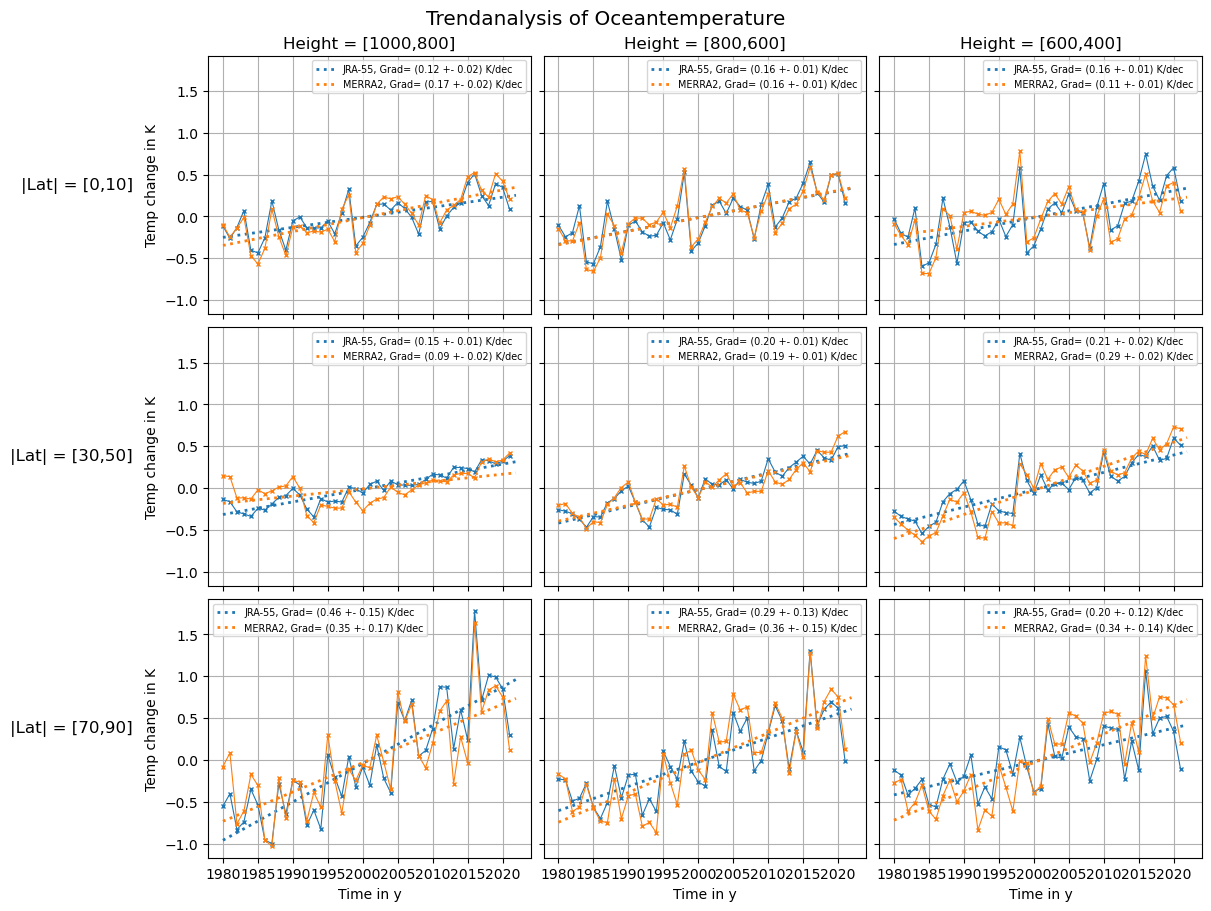

Full Gradient [[[0.12006138 0.15949175 0.16065148]
  [0.15062509 0.19938314 0.20771846]
  [0.45850785 0.28964196 0.19960605]]

 [[0.16597655 0.1623526  0.10939877]
  [0.08713217 0.18814452 0.28776821]
  [0.3501506  0.35561852 0.34389088]]]
Mean,Std of zones [[0.24306477 0.21617229 0.18932533]
 [0.20108644 0.23537188 0.24701929]] [[0.1528514  0.05444371 0.02054418]
 [0.1102095  0.0856767  0.09997331]]
Mean,Std of heights [[0.14673487 0.1859089  0.31591862]
 [0.1459093  0.18768163 0.34988667]] [[0.01886695 0.02518041 0.10731692]
 [0.02585921 0.08190997 0.00479142]]


In [15]:
maketrendana(zones,heights,(DS1.ds.T.where(TOPO.land_mask_reindexed==False),DS2.ds.T.where(TOPO.land_mask_reindexed==False)),'Oceantemperature', ['Temp',"K"],"K",(DS1.setname,DS2.setname))

Process zone: [0, 10]
[########################################] | 100% Completed | 23.36 s
Done with [0, 10],[1000, 800]
Done with [0, 10],[800, 600]
Done with [0, 10],[600, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 4.83 sms
Done with [30, 50],[1000, 800]
Done with [30, 50],[800, 600]
Done with [30, 50],[600, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 4.12 sms
Done with [70, 90],[1000, 800]
Done with [70, 90],[800, 600]
Done with [70, 90],[600, 400]
Process zone: [0, 10]
[########################################] | 100% Completed | 107.14 s
Done with [0, 10],[1000, 800]
Done with [0, 10],[800, 600]
Done with [0, 10],[600, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 102.50 s
Done with [30, 50],[1000, 800]
Done with [30, 50],[800, 600]
Done with [30, 50],[600, 400]
Process zone: [70, 90]
[########################################] | 100% Completed |

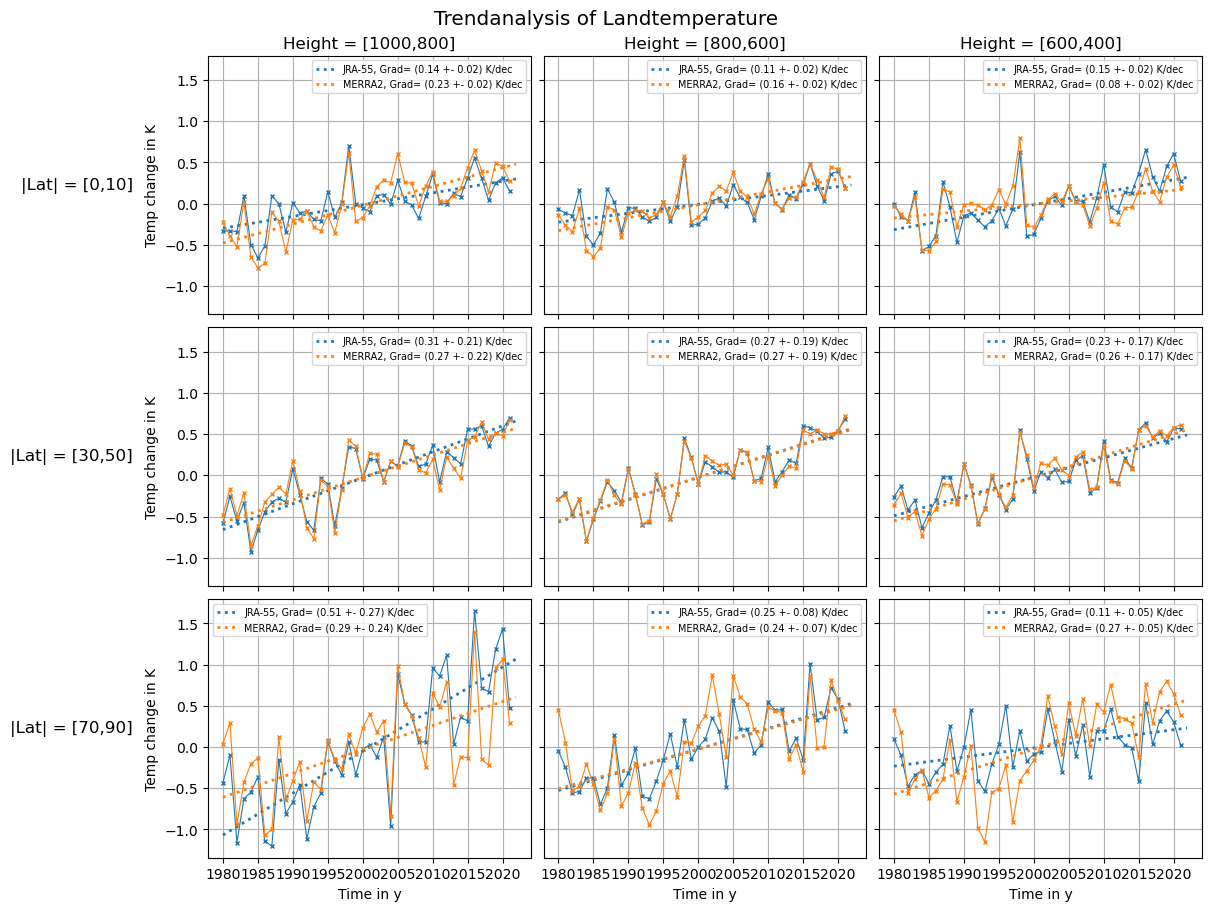

Full Gradient [[[0.14265279 0.10784062 0.15137177]
  [0.31477584 0.26971539 0.2344428 ]
  [0.50982878 0.25132955 0.11035192]]

 [[0.22833725 0.15692232 0.0837815 ]
  [0.27241324 0.26506812 0.26427921]
  [0.29048705 0.24115328 0.27272173]]]
Mean,Std of zones [[0.32241914 0.20962852 0.16538883]
 [0.26374585 0.2210479  0.20692748]] [[0.14999637 0.07236524 0.05162038]
 [0.02610226 0.04638281 0.08714554]]
Mean,Std of heights [[0.13395506 0.27297801 0.29050342]
 [0.15634702 0.26725352 0.26812069]] [[0.01880564 0.03287687 0.16542145]
 [0.05901604 0.00366266 0.02040151]]


In [16]:
maketrendana(zones,heights,(DS1.ds.T.where(TOPO.land_mask_reindexed==True),DS2.ds.T.where(TOPO.land_mask_reindexed==True)),'Landtemperature', ['Temp',"K"],'K',(DS1.setname,DS2.setname))

Process zone: [0, 10]
[########################################] | 100% Completed | 70.95 s
Done with [0, 10],[1000, 800]
Done with [0, 10],[800, 600]
Done with [0, 10],[600, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 28.24 s
Done with [30, 50],[1000, 800]
Done with [30, 50],[800, 600]
Done with [30, 50],[600, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 29.50 s
Done with [70, 90],[1000, 800]
Done with [70, 90],[800, 600]
Done with [70, 90],[600, 400]
Process zone: [0, 10]
[########################################] | 100% Completed | 154.08 s
Done with [0, 10],[1000, 800]
Done with [0, 10],[800, 600]
Done with [0, 10],[600, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 98.89 s
Done with [30, 50],[1000, 800]
Done with [30, 50],[800, 600]
Done with [30, 50],[600, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 10

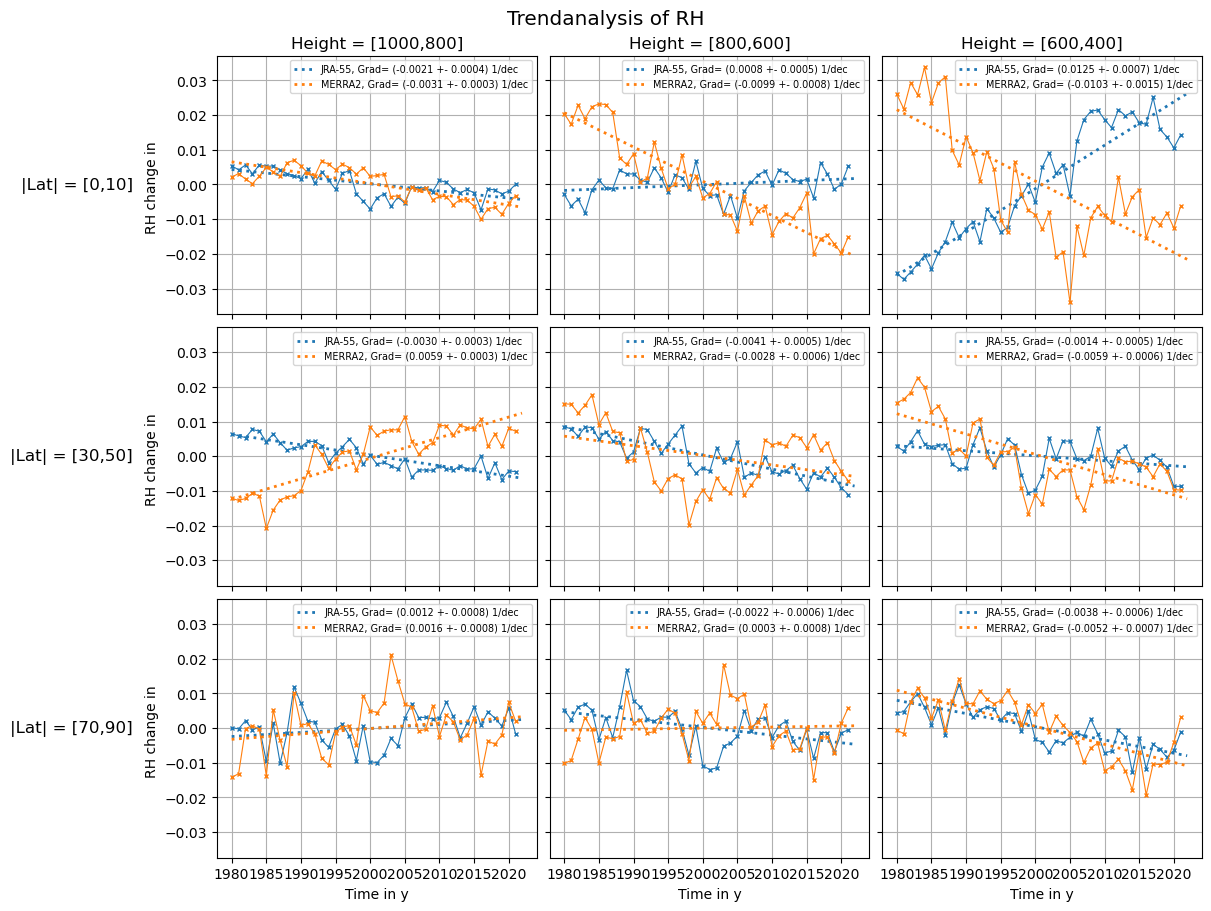

Full Gradient [[[-0.002059    0.00081789  0.01252344]
  [-0.00301807 -0.00409811 -0.00144897]
  [ 0.00116682 -0.00223134 -0.00381254]]

 [[-0.00311929 -0.00986448 -0.01029182]
  [ 0.00593609 -0.00276612 -0.00585322]
  [ 0.00155534  0.00031043 -0.00520282]]]
Mean,Std of zones [[-0.00130342 -0.00183719  0.00242064]
 [ 0.00145738 -0.00410672 -0.00711595]] [[0.00179007 0.00202621 0.00720863]
 [0.00369749 0.00426068 0.00226132]]
Mean,Std of heights [[ 0.00376078 -0.00285505 -0.00162569]
 [-0.00775853 -0.00089441 -0.00111235]] [[0.00630647 0.00108763 0.00207744]
 [0.00328507 0.00499162 0.00293671]]


In [17]:
maketrendana(zones,heights,(DS1.ds.RH,DS2.ds.RH),'RH', ['RH',""],'1',(DS1.setname,DS2.setname))

Process zone: [0, 10]
[########################################] | 100% Completed | 33.36 s
Done with [0, 10],[1000, 800]
Done with [0, 10],[800, 600]
Done with [0, 10],[600, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 28.04 s
Done with [30, 50],[1000, 800]
Done with [30, 50],[800, 600]
Done with [30, 50],[600, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 27.72 s
Done with [70, 90],[1000, 800]
Done with [70, 90],[800, 600]
Done with [70, 90],[600, 400]
Process zone: [0, 10]
[########################################] | 100% Completed | 106.63 s
Done with [0, 10],[1000, 800]
Done with [0, 10],[800, 600]
Done with [0, 10],[600, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 105.48 s
Done with [30, 50],[1000, 800]
Done with [30, 50],[800, 600]
Done with [30, 50],[600, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 1

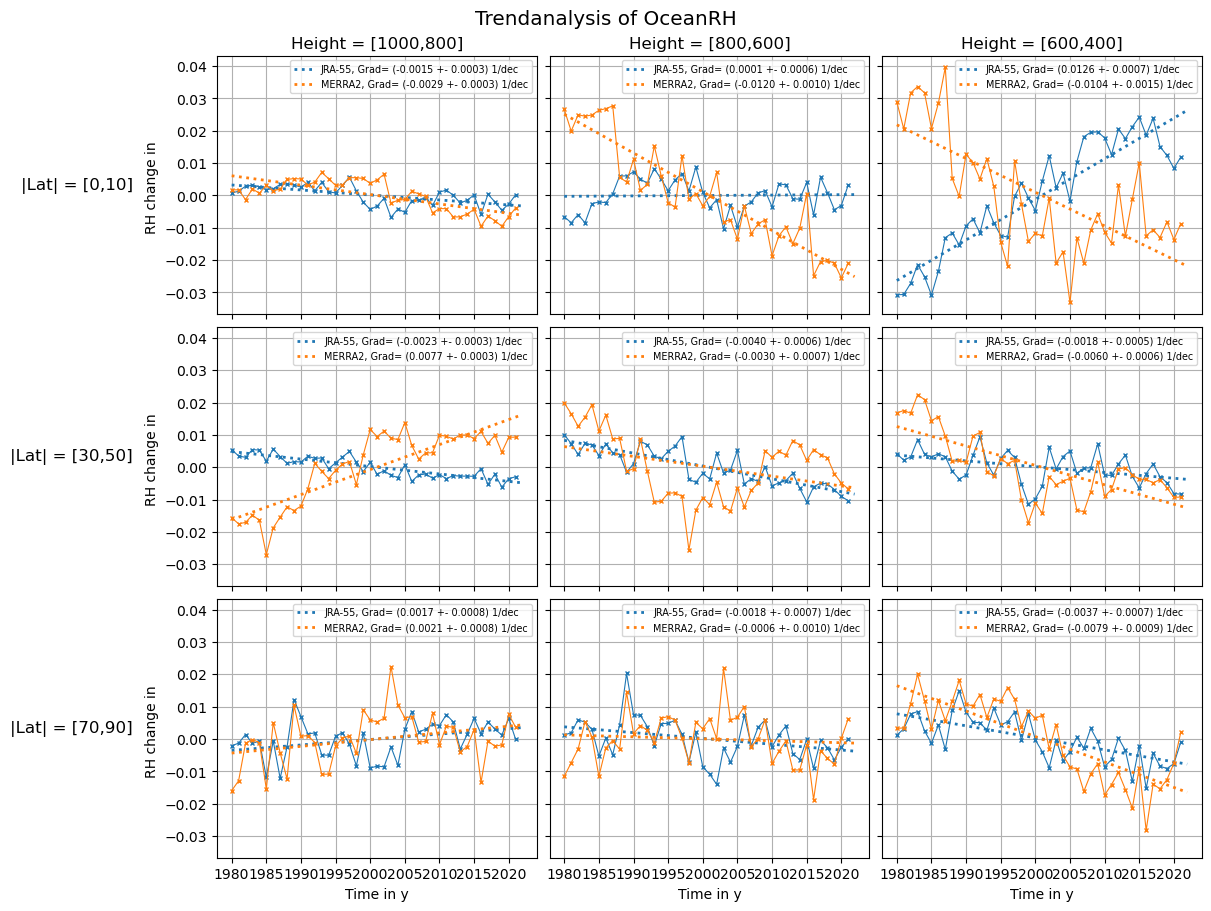

Full Gradient [[[-0.00154378  0.00012801  0.01255316]
  [-0.0023011  -0.00396745 -0.0017899 ]
  [ 0.00168227 -0.00179315 -0.00371244]]

 [[-0.0029051  -0.01197879 -0.01042002]
  [ 0.00773863 -0.00304472 -0.00600402]
  [ 0.00207577 -0.00060727 -0.00786259]]]
Mean,Std of zones [[-0.00072087 -0.00187753  0.00235028]
 [ 0.0023031  -0.00521026 -0.00809554]] [[0.00172717 0.00167303 0.0072571 ]
 [0.00434826 0.00488842 0.00181034]]
Mean,Std of heights [[ 0.00371246 -0.00268615 -0.00127444]
 [-0.00843464 -0.00043671 -0.00213136]] [[0.00628847 0.00092974 0.00223271]
 [0.00396142 0.00590573 0.00419801]]


In [18]:
maketrendana(zones,heights,(DS1.ds.RH.where(TOPO.land_mask_reindexed==False),DS2.ds.RH.where(TOPO.land_mask_reindexed==False)),'OceanRH', ['RH',""],'1',(DS1.setname,DS2.setname))

Process zone: [0, 10]
[########################################] | 100% Completed | 34.30 s
Done with [0, 10],[1000, 800]
Done with [0, 10],[800, 600]
Done with [0, 10],[600, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 27.73 s
Done with [30, 50],[1000, 800]
Done with [30, 50],[800, 600]
Done with [30, 50],[600, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 27.33 s
Done with [70, 90],[1000, 800]
Done with [70, 90],[800, 600]
Done with [70, 90],[600, 400]
Process zone: [0, 10]
[########################################] | 100% Completed | 104.63 s
Done with [0, 10],[1000, 800]
Done with [0, 10],[800, 600]
Done with [0, 10],[600, 400]
Process zone: [30, 50]
[########################################] | 100% Completed | 99.14 s
Done with [30, 50],[1000, 800]
Done with [30, 50],[800, 600]
Done with [30, 50],[600, 400]
Process zone: [70, 90]
[########################################] | 100% Completed | 10

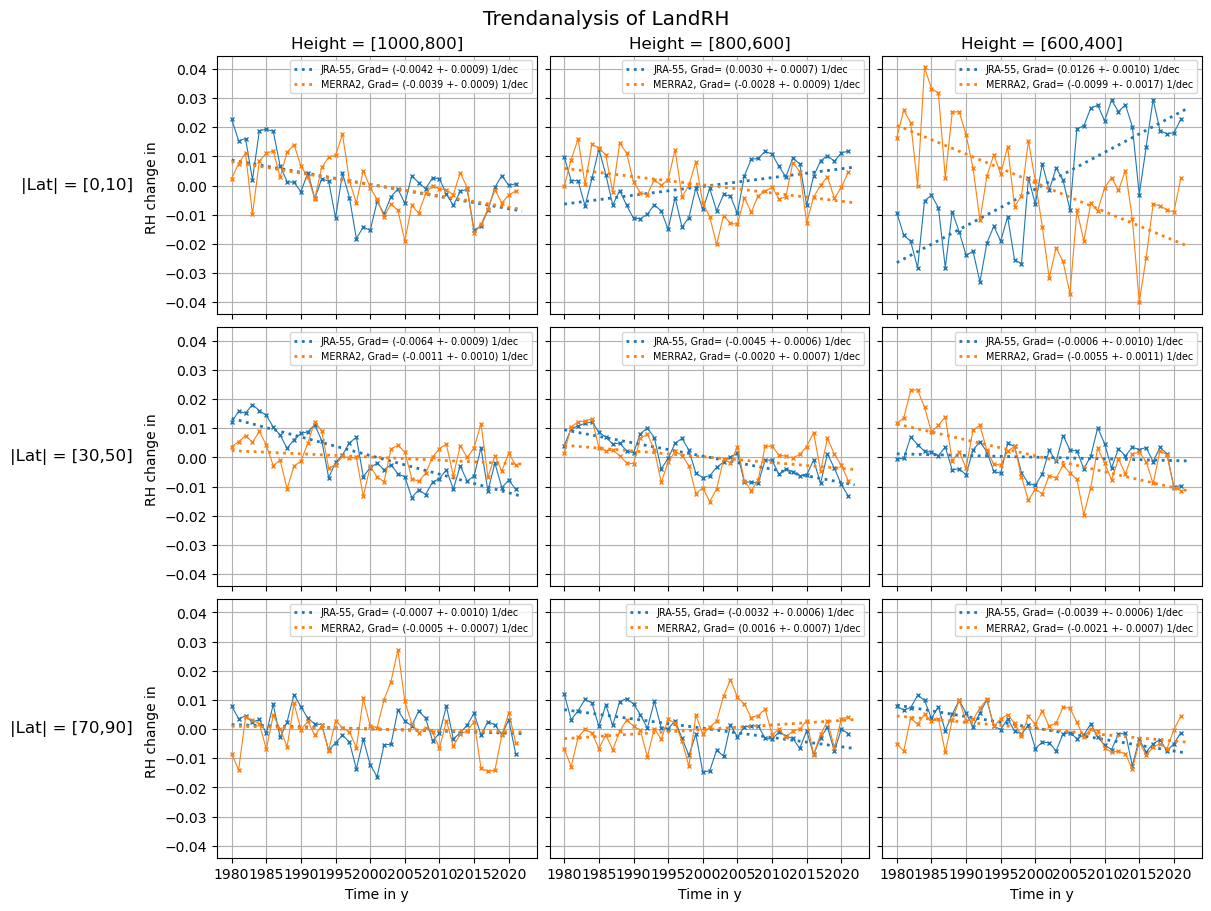

Full Gradient [[[-0.00416461  0.00302478  0.01260401]
  [-0.00638019 -0.00450299 -0.00057954]
  [-0.00072726 -0.0031714  -0.00393527]]

 [[-0.00389888 -0.00281575 -0.00986494]
  [-0.00109773 -0.00198256 -0.00545818]
  [-0.00047792  0.00155847 -0.00213828]]]
Mean,Std of zones [[-0.00375735 -0.00154987  0.0026964 ]
 [-0.00182485 -0.00107995 -0.00582047]] [[0.0023257  0.00328013 0.00713843]
 [0.00148824 0.0018964  0.00316478]]
Mean,Std of heights [[ 0.00382139 -0.00382091 -0.00261131]
 [-0.00552653 -0.00284616 -0.00035257]] [[0.0068689  0.00241672 0.00136824]
 [0.00309943 0.00188197 0.00151179]]


In [19]:
maketrendana(zones,heights,(DS1.ds.RH.where(TOPO.land_mask_reindexed==True),DS2.ds.RH.where(TOPO.land_mask_reindexed==True)),'LandRH', ['RH',""],'1',(DS1.setname,DS2.setname))

In [ ]:
'''
Idee klappt leider nicht!

heights_T=[[10,15]]
fig, axes = startfig(zones,'Trendanalysis of Temperature')


for DS in (DS1,DS2):
  
        
    inr=0
    for i in zones:
        print(f"Process zone: {i}")
        with ProgressBar():
            Temp_raw=dask.compute(DS.ds.T.where((np.abs(DS.ds.lat) >= i[0]) & (np.abs(DS.ds.lat) <= i[1])))[0]
        
        for j in heights_T:
            
            
            print(f"Process height: {j}")
            with ProgressBar():
                Temp=dask.compute(Temp_raw.where(((DS.ds.T) >= j[0]) & ((DS.ds.T) <= j[1]) & ~np.isnan(Temp_raw.T)).weighted(np.cos(np.deg2rad(DS.ds.lat))).mean(("p","lon","lat")))[0]
                Temp=Temp-Temp.where(~np.isnan(Temp.T)).mean("time").to_numpy()

            
            
            Temp.attrs = DS.ds.T.attrs
            time_raw=Temp.time
            time_mon=time_raw.dt.month+12*time_raw.dt.year


            lin_para,dlin_para=so.curve_fit(lin,time_mon.where(~np.isnan(Temp.T)).to_numpy(),Temp.T.where(~np.isnan(Temp.T)).to_numpy())
            dlin_para=np.sqrt(dlin_para.diagonal())

            decimals=2
            
            lh, = axes[inr,1].plot(
                time_raw.to_numpy()[::12],
                year_mean(Temp).to_numpy(), 
                label=f"{DS.setname}, [{j[0]},{j[1]}]T",
                markersize=3, marker = "x", linestyle='-', linewidth = 0.8
            )

            axes[inr,1].plot(
                time_raw.to_numpy(),
                lin(time_mon.to_numpy(),*lin_para),
                label=f"Fit: grad= {12*lin_para[0]:.3f} +- {12*dlin_para[0]:.3f} K/y",
                color=lh.get_color(), linewidth = '2', linestyle='dotted',
            )
            
            axes[inr,1].legend(fontsize="x-small",
                              )
            
            print(f"Done with {i},{j}")
        
        inr=inr+1
        
    

fig.savefig(f"{RESLOC}{RESLOC_SPECIFIC}Temp_Timeseries.png")

plt.show()

endfig(fig, axes, 'Test.png')
'''